In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
SDSS_DR16 = 'SDSS_DR16_90cutoff_for_Vicky.csv'
df = pd.read_csv(SDSS_DR16)


In [3]:
u = np.array(df.loc[:, 'petroMag_u'])
g = np.array(df.loc[:, 'petroMag_g'])
r = np.array(df.loc[:, 'petroMag_r'])
i = np.array(df.loc[:, 'petroMag_i'])
z = np.array(df.loc[:, 'petroMag_z'])

ug = u-g
ur = u-r
ui = u-i
uz = u-z
gr = g-r
gi = g-i
gz = g-z
ri = r-i
rz = r-z
iz = i-z

Types = df.loc[:, 'Types']
types = Types.apply(lambda v: v.replace(
    'elliptical', '0').replace('spiral', '1')).astype(int)

X = np.array(list(zip(*(ug, ur, ui, uz, gr, gi, gz, ri, rz, iz))))
y = np.array(types)

In [4]:
# X = [(a1, b1, c1, d1, e1), (a2, b2, c2, d2, e2), (a3, b3, c3, d3, e3),...]
# *X = (a1, b1, c1, d1, e1) (a2, b2, c2, d2, e2) (a3, b3, c3, d3, e3)...
# zip(*X) = (a1, a2, a3,...), (b1, b2, b3,...), (c1, c2, c3,...), (d1, d2, d3,...), (e1, e2, e3,...) --> อ่านไม่ได้เลยต้องใส่ list

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
#randon_state ไว้กำหนดให้การ split ข้อมูลแต่ล่ะครั้ง ให้หน้าตาเหมือนเดิม ที่เป็น 42 เพราะว่ามีคนใช้แล้วใช้ตามกันเฉยๆ


In [6]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(394005, 10)
(131335, 10)
(394005,)
(131335,)


In [7]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

C = 1000000000
gamma = 0.0001

# RBF Kernel
# svm_rbf = SVC(kernel='rbf', C=C, gamma=gamma)

# svm_fit = svm_rbf.fit(X_train, y_train)
# svm_fit


In [8]:
import pickle

# save train-test data
# svm_save = open('svm_color.csv', 'wb')
# pickle.dump(svm_fit, svm_save)
# svm_save.close()


In [9]:
# load data
svm_read = open('svm_color.csv', 'rb')
svm = pickle.load(svm_read)
svm


SVC(C=1000000000, gamma=0.0001)

In [10]:
# train_ = svm.score(X_train, y_train)
# test_ = svm.score(X_test, y_test)

# y_pred_ = svm.predict(X_test)

# y_score_ = svm.decision_function(X_test)

# svm_var = [train_, test_, y_pred_, y_score_]

In [11]:
# svm_save_var = open('svm_color_var.csv', 'wb')
# pickle.dump(svm_var, svm_save_var)
# svm_save_var.close()

In [12]:
svm_read_var = open('svm_color_var.csv', 'rb')
svm_result = pickle.load(svm_read_var)


In [13]:
# 0, 1, 2, 3
train = svm_result[0]
test = svm_result[1]
y_pred = svm_result[2]
y_score = svm_result[3]

train, test, y_pred, y_score

(0.8442430933617594,
 0.8426466669204705,
 array([0, 1, 0, ..., 1, 1, 1]),
 array([-6781.75829674, 18337.12961672,  -167.42688884, ...,
         1567.43178044, 17897.07600187, 21634.51953565]))

In [14]:
print("Train set accuracy = " + str(train))
print("Test set accuracy = " + str(test))

Train set accuracy = 0.8442430933617594
Test set accuracy = 0.8426466669204705


In [15]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

(53920, 7883, 12783, 56749)

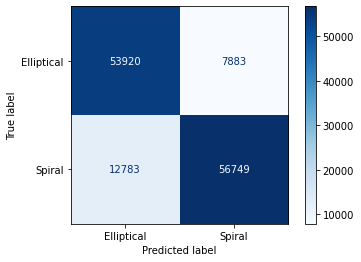

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay

label_name = 'Elliptical', 'Spiral'

ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, cmap='Blues', display_labels=label_name)
    
plt.show()

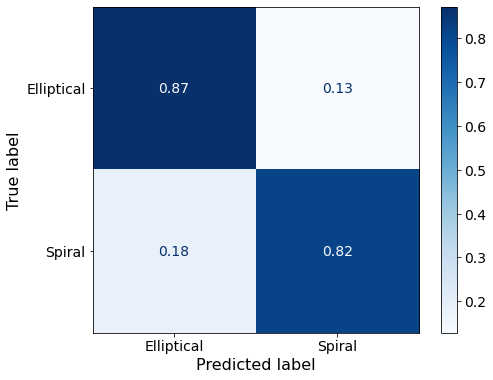

In [23]:
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, cmap='Blues', normalize='true', display_labels=label_name, ax=ax)


ax.set_xlabel('Predicted label', fontdict={'size':'16'})
ax.set_ylabel('True label', fontdict={'size':'16'})
ax.tick_params(axis='both', labelsize=14)
    
plt.show()

negative = elliptical

positive = spiral

In [18]:
X_test_tn = []
X_test_tp = []
X_test_fn = []
X_test_fp = []

for i in np.arange(0, len(y_test), 1):
    if y_test[i] == y_pred[i] == 0:
        # 0 = Elliptical = n
        X_test_tn += [X_test[i]]

    elif y_test[i] == y_pred[i] == 1:
        # 1 = Spiral = p
        X_test_tp += [X_test[i]]
        
    elif y_test[i] > y_pred[i]:
        # 1 > 0 = Spiral but pred Elliptical
        X_test_fn += [X_test[i]]
        
    elif y_test[i] < y_pred[i]:
        # 0 < 1 = Elliptical but pred Spiral
        X_test_fp += [X_test[i]]


In [19]:
X_test_tn = list(zip(*X_test_tn))
X_test_tp = list(zip(*X_test_tp))
X_test_fn = list(zip(*X_test_fn))
X_test_fp = list(zip(*X_test_fp))

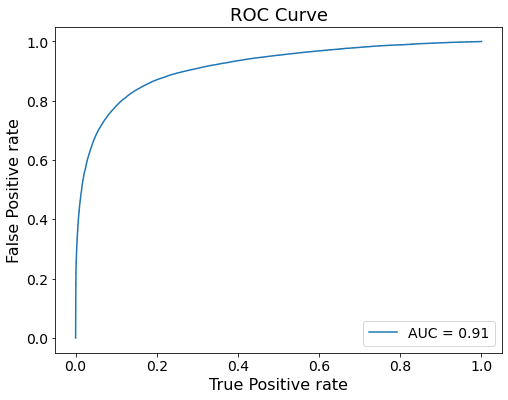

In [24]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn import metrics

fig, ax = plt.subplots(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=svm.classes_[1])
roc_auc = metrics.auc(fpr, tpr)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot(ax=ax)

plt.rcParams.update({'font.size': 14})
plt.tick_params(axis='both', labelsize=14)
plt.xlabel('True Positive rate', fontdict={'size':'16'})
plt.ylabel('False Positive rate', fontdict={'size':'16'})
plt.title('ROC Curve', size=18)

plt.show()

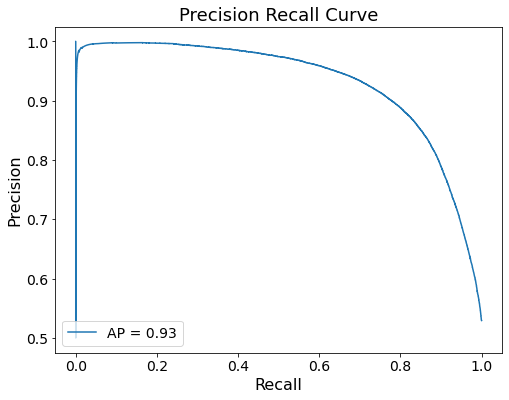

In [21]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import average_precision_score

fig, ax = plt.subplots(figsize=(8, 6))

prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=svm.classes_[1])
ap = average_precision_score(y_test, y_score)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall, average_precision=ap).plot(ax=ax)

plt.rcParams.update({'font.size': 14})
plt.tick_params(axis='both', labelsize=14)
plt.xlabel('Recall', fontdict={'size':'16'})
plt.ylabel('Precision', fontdict={'size':'16'})
plt.title('Precision Recall Curve', size=18)

plt.show()

In [22]:
from sklearn.inspection import permutation_importance

feature_names = ['u-g', 'u-r', 'u-i', 'u-z', 'g-r', 'g-i', 'g-z', 'r-i', 'r-z', 'i-z']
features = np.array(feature_names)


In [25]:
# perm_importance = permutation_importance(svm, X_test, y_test)

In [26]:
# save_imp = open('svm_color_perm_imp.csv', 'wb')
# pickle.dump(perm_importance, save_imp)
# save_imp.close()

In [27]:
read_imp = open('svm_color_perm_imp.csv', 'rb')
perm_imp = pickle.load(read_imp)
perm_imp

{'importances_mean': array([0.00736742, 0.25641756, 0.01171356, 0.0061385 , 0.11239197,
        0.00067461, 0.02607226, 0.00994556, 0.01418967, 0.00181521]),
 'importances_std': array([1.32809052e-04, 1.20678920e-03, 2.21443854e-04, 4.38758141e-04,
        1.27690347e-03, 9.51734115e-05, 5.82933105e-04, 3.72746586e-04,
        5.01529322e-04, 3.82213484e-04]),
 'importances': array([[0.00718773, 0.00743899, 0.00744661, 0.00753036, 0.00723341],
        [0.25550691, 0.25872007, 0.25559067, 0.25574295, 0.2565272 ],
        [0.01188564, 0.01205315, 0.01157346, 0.01160391, 0.01145163],
        [0.00638824, 0.00586287, 0.0065253 , 0.00540602, 0.00651007],
        [0.11211787, 0.11448586, 0.11096813, 0.11130316, 0.11308486],
        [0.00060152, 0.00055583, 0.00071573, 0.00082994, 0.00067004],
        [0.02617733, 0.02655042, 0.0259413 , 0.0250276 , 0.02666464],
        [0.01027144, 0.00957856, 0.00986028, 0.01047702, 0.00954049],
        [0.01398713, 0.01416226, 0.01436784, 0.01498458, 0.013

Text(0.5, 0, 'Importance Score')

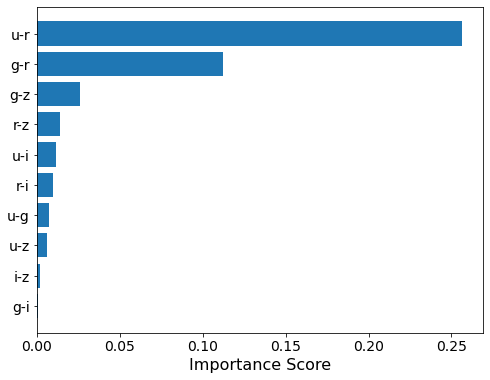

In [28]:
sorted_idx = perm_imp.importances_mean.argsort()

plt.figure(figsize=(8, 6), facecolor='none')

plt.barh(features[sorted_idx], perm_imp.importances_mean[sorted_idx])

plt.tick_params(axis='both', labelsize=14)
plt.xlabel('Importance Score', size=16)


In [87]:
def tn_tp_fn_fp(xlim, xticks, step, xlabel, pos):
    plt.figure(figsize=(8, 6), facecolor='none')
    plt.gca(xlim=xlim, xticks = xticks)

    # step = 0.15
    bins = np.arange(np.min(X_test), np.max(X_test) + step, step)

    plt.hist(X_test_tn[pos], bins=bins, alpha=0.5, label='tn')
    plt.hist(X_test_tp[pos], bins=bins, alpha=0.5, label='tp')
    plt.hist(X_test_fn[pos], bins=bins, alpha=0.5, label='fn')
    plt.hist(X_test_fp[pos], bins=bins, alpha=0.5, label='fp')

    plt.xlabel(str(xlabel), size=16)
    plt.ylabel('Number', size=16)
    plt.legend(loc='upper right')

    plt.tick_params(which='major', direction='in', length=5, labelsize='12')

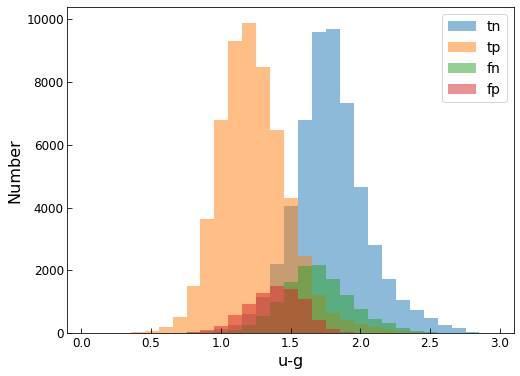

In [88]:
tn_tp_fn_fp([0.25, 3], np.arange(0.5, 3.5, 0.5), 0.1, 'u-g', 0)

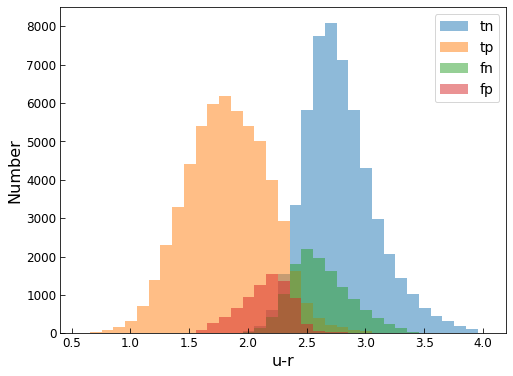

In [89]:
tn_tp_fn_fp([0.4, 4.2], np.arange(0.5, 4.5, 0.5), 0.1, 'u-r', 1)

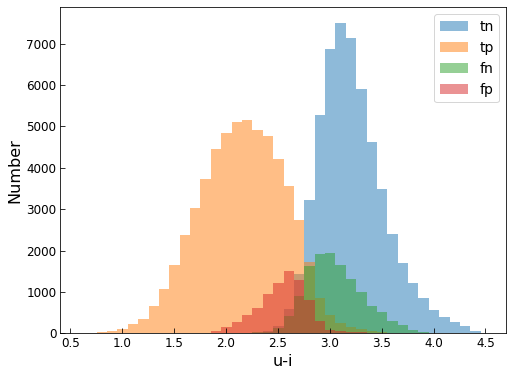

In [90]:
tn_tp_fn_fp([0.4, 4.7], np.arange(0.5, 5, 0.5), 0.1, 'u-i', 2)

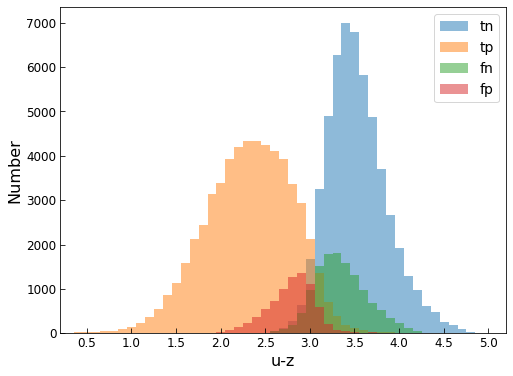

In [91]:
tn_tp_fn_fp([0.2, 5.2], np.arange(0.5, 5.5, 0.5), 0.1, 'u-z', 3)

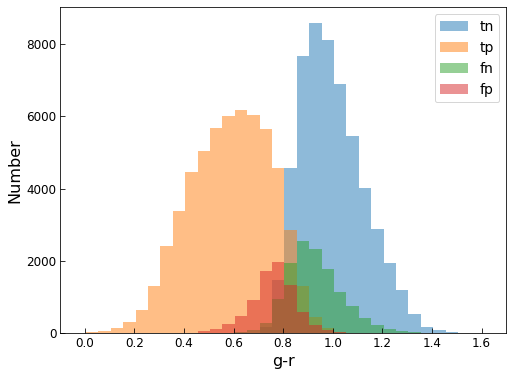

In [92]:
tn_tp_fn_fp([-0.1, 1.7], np.arange(0, 1.7, 0.2), 0.05, 'g-r', 4)

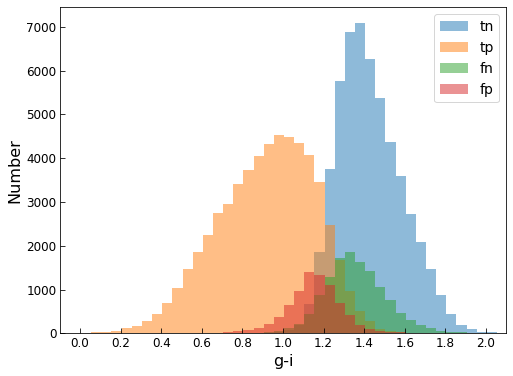

In [93]:
tn_tp_fn_fp([-0.1, 2.1], np.arange(0, 2.2, 0.2), 0.05, 'g-i', 5)

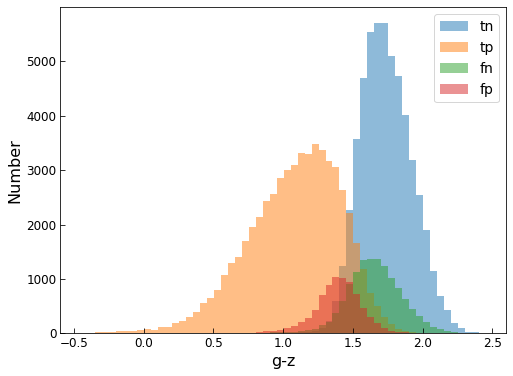

In [94]:
tn_tp_fn_fp([-0.6, 2.6], np.arange(-0.5, 3, 0.5), 0.05, 'g-z', 6)

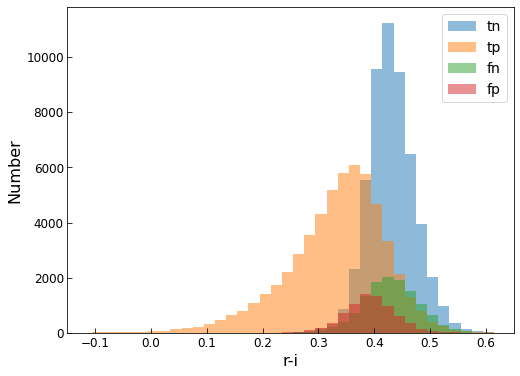

In [100]:
tn_tp_fn_fp([-0.15, 0.65], np.arange(-0.1, 0.7, 0.1), 0.02, 'r-i', 7)

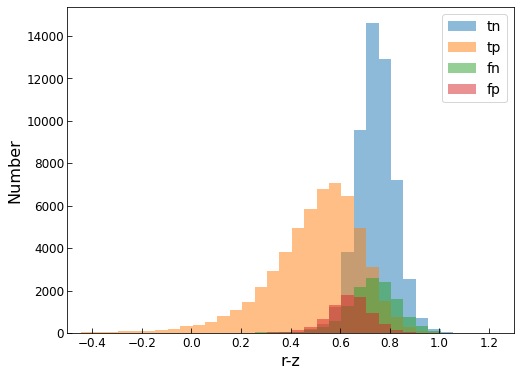

In [105]:
tn_tp_fn_fp([-0.5, 1.3], np.arange(-0.4, 1.3, 0.2), 0.05, 'r-z', 8)

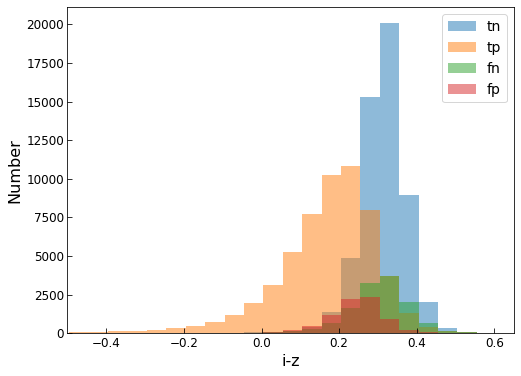

In [106]:
tn_tp_fn_fp([-0.5, 0.65], np.arange(-0.4, 0.7, 0.2), 0.05, 'i-z', 9)